# Импорт библиотек

In [63]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

# Загрузка данных

In [64]:
df = pd.read_csv('./KaggleV2-May-2016.csv')

# Разведочный анализ данных

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## Анализ целевой переменной

*Каково соотношение людей, которые пропускают приемы, к тем, кто этого не делает?*

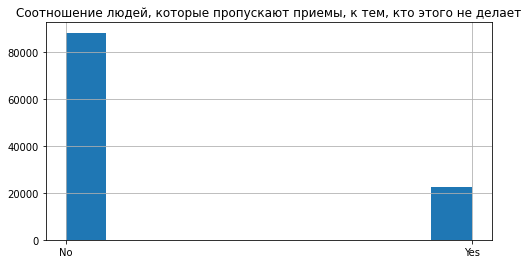

In [66]:
plt.figure(figsize=(8,4))
df['No-show'].hist()
plt.title('Соотношение людей, которые пропускают приемы, к тем, кто этого не делает');

In [67]:
df['No-show'].value_counts(True)

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64

*Кто не появляется чаще — мужчины или женщины?*

In [68]:
df[df['No-show']=='Yes']['Gender'].value_counts(True)

F    0.653882
M    0.346118
Name: Gender, dtype: float64

**Обработка пропуска в данных**

In [69]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Нам повезло — в нашем наборе данных нет нулевых значений.

# Предобработка данных

**Кодировка категориальных признаков**

In [70]:
categorical_columns_names = ['Gender', 'Neighbourhood']

In [71]:
encoded_columns = pd.get_dummies(df, columns = categorical_columns_names)

In [72]:
encoded_columns.drop(['AppointmentID','PatientId','ScheduledDay','AppointmentDay','No-show'], axis=1, inplace=True)

In [73]:
encoded_columns.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Gender_F,Gender_M,Neighbourhood_AEROPORTO,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,62,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,56,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,62,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,56,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
y = df['No-show']
y = y.replace({'No':0,'Yes':1})

In [75]:
y.value_counts(True)

0    0.798067
1    0.201933
Name: No-show, dtype: float64

# АНАЛИЗ КОРРЕЛЯЦИИ ЧИСЛОВЫХ ПРИЗНАКОВ

In [76]:
chosen_columns = ['Age','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']

In [77]:
numeric_data = encoded_columns[chosen_columns]
numeric_data.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,62,0,1,0,0,0,0
1,56,0,0,0,0,0,0
2,62,0,0,0,0,0,0
3,8,0,0,0,0,0,0
4,56,0,1,1,0,0,0


<AxesSubplot:>

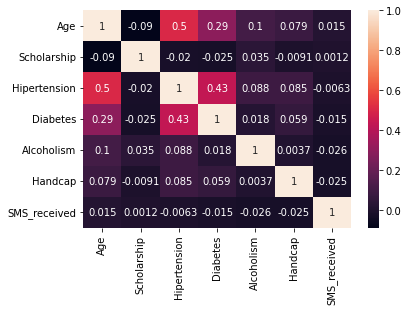

In [78]:
sns.heatmap(numeric_data.corr(method = 'spearman'), annot = True)

# Работа с comet_ml

*Инсталлируем comet_ml*

In [79]:
!pip install comet_ml

In [80]:
from comet_ml import Experiment

In [81]:
experiment = Experiment(
    api_key="ljP7eT1JkmOr5tXQ1KFfdaId5",
    project_name="medical-appointment",
    workspace="TattaS",
)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/tattas/medical-appointment/70d07fbacd0948ee99a6cd9afdd073ac
COMET INFO:   Metrics:
COMET INFO:     metric : 0.798067440534892
COMET INFO:   Parameters:
COMET INFO:     C                 : 1.0
COMET INFO:     class_weight      : 1
COMET INFO:     clip              : False
COMET INFO:     copy              : True
COMET INFO:     dual              : False
COMET INFO:     feature_range     : (0, 1)
COMET INFO:     fit_intercept     : True
COMET INFO:     intercept_scaling : 1
COMET INFO:     l1_ratio          : 1
COMET INFO:     max_iter          : 100
COMET INFO:     model_type        : logreg
COMET INFO:     multi_class       : auto
COMET INFO:     n_jobs            : 1
COMET INFO:     penalty           : l2
COMET INFO:     random_state      : 42
CO

**АНАЛИЗ КОРРЕЛЯЦИИ ЦИФРОВЫХ ПРИЗНАКОВ**

In [82]:
chosen_columns = ['Age','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']
numeric_data = encoded_columns[chosen_columns]
numeric_data.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,62,0,1,0,0,0,0
1,56,0,0,0,0,0,0
2,62,0,0,0,0,0,0
3,8,0,0,0,0,0,0
4,56,0,1,1,0,0,0


{'web': 'https://www.comet.ml/api/image/download?imageId=163ff54b61ab42b88cf480d306563298&experimentKey=eb46c0835548412d9360cd677059726f',
 'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=163ff54b61ab42b88cf480d306563298&experimentKey=eb46c0835548412d9360cd677059726f',
 'imageId': '163ff54b61ab42b88cf480d306563298'}

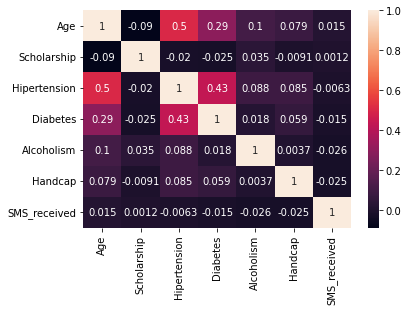

In [83]:
sns.heatmap(numeric_data.corr(method = 'spearman'), annot = True)
experiment.log_figure(figure = plt)

Вывод: Статистически значимая корреляция существует между признаками Age и Hipertension, Age и Diabets, Hipertension и Diabets.

**Гистограммы распределения признаков**

{'web': 'https://www.comet.ml/api/image/download?imageId=4b1af8a4297748808b0474653b4494ac&experimentKey=eb46c0835548412d9360cd677059726f',
 'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=4b1af8a4297748808b0474653b4494ac&experimentKey=eb46c0835548412d9360cd677059726f',
 'imageId': '4b1af8a4297748808b0474653b4494ac'}

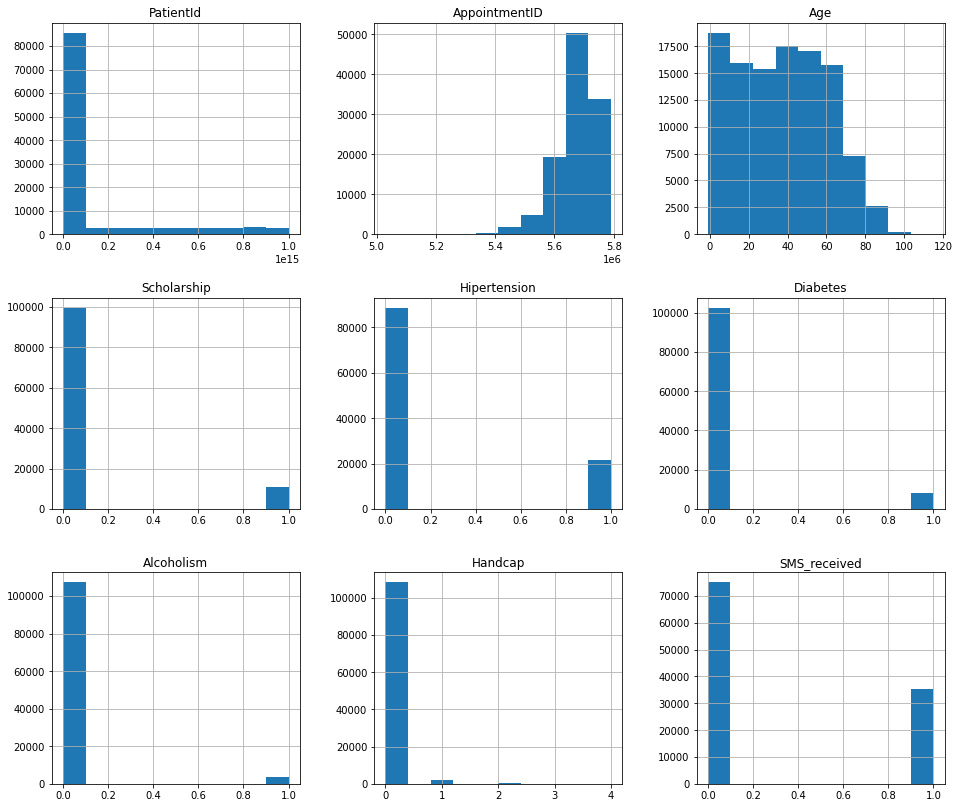

In [84]:
df.hist(figsize = (16,14))
experiment.log_figure(figure = plt)

**Распределение пациентов по возрасту**

In [85]:
print('Уникальные значения в Age => {}'.format(df['Age'].unique()))

Уникальные значения в Age => [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


In [86]:
df = df[(df['Age']>0 & (df['Age'] < 110))]
df['Age'].value_counts()

1      2273
52     1746
49     1652
53     1651
56     1635
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 102, dtype: int64

/home/tatiana/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


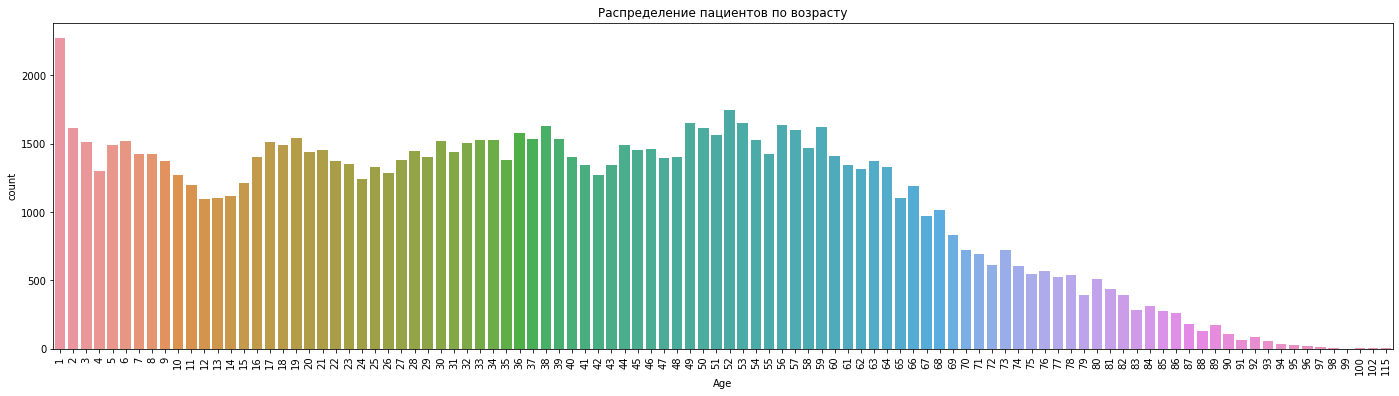

In [87]:
plt.figure(figsize = (24,6))
plt.xticks(rotation = 90)
ax = sns.countplot(df['Age'])
ax.set_title('Распределение пациентов по возрасту')
experiment.log_figure(figure = plt)
plt.show()

# Шкалирование данных

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
scaler = MinMaxScaler()
X = scaler.fit_transform(encoded_columns)

In [90]:
print(X.shape)

(110527, 90)


*Модель*

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [92]:
logreg = LogisticRegression()

In [93]:
random_state = 42

*Обучение модели*

In [94]:
logreg.fit(X,y)

/home/tatiana/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

*Логирование параметров обучения*

In [95]:
params = {'random_state':random_state, 'model_type':'logreg'}

In [96]:
experiment.log_parameters(params)

*Предсказание модели*

In [97]:
y_pred = logreg.predict(X)

*Анализ модели*

In [98]:
acuracy = accuracy_score(y,y_pred)
print('Доля правильных ответов:{:6.3f}'.format(acuracy))

Доля правильных ответов: 0.798


*Логирование метрик*

In [99]:
metrics = {'metric':acuracy}

In [100]:
experiment.log_metrics(metrics)

In [101]:
experiment.log_confusion_matrix(y.tolist(),y_pred.tolist())

{'web': 'https://www.comet.ml/api/asset/download?assetId=88fa6265385f44b08205b9fd39b255f3&experimentKey=eb46c0835548412d9360cd677059726f',
 'api': 'https://www.comet.ml/api/rest/v2/experiment/asset/get-asset?assetId=88fa6265385f44b08205b9fd39b255f3&experimentKey=eb46c0835548412d9360cd677059726f',
 'assetId': '88fa6265385f44b08205b9fd39b255f3'}